<a href="https://colab.research.google.com/github/beamscource/colab_notebooks/blob/main/ml_nlp_advanced_neural_architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Differences between MLP, CNN, and RNN**

An **MLP (multi-layer perceptron)** is a fully connected (FC) network also often referred to as a **feed-forward neural network**.

MLPs are common in simple classification and linear regression problems. However, MLPs are not optimal for processing  multi-dimensional (e.g., images, videoframes, spectrogramms) and sequential (e.g., text, time series) data patterns.

For multi-dimensional data like images and videos, **convolutional neural networks (CNNs)** excel in extracting feature maps for classification, segmentation, generation, and other downstream tasks.

For sequential data input, **recurrent neural networks (RNNs)** are popular, because their internal design allows the network to discover dependency in the history of the data, which is useful for prediction.

Historically, RNNs (specifically their sub-types **LSTMs** and **GRUs** were used for classification and tanslations tasks on text. However, with the advent of the **Transformer** these approaches seem to have become obsolete for text data.

For speech recognition on the other hand, **LSTMs/GRUs** are still relevant since they allow to implement real-time processing of speech while Transformer-based models require bigger chunks of speech before they can begin to output a transcrition.

This is due to the self-attention layers which have to compute "contextualized" embeddings of text or sounds. For instance, the recently published speech recognition model by Open Ai (Whisper) has to process 30 second chunks of speech at once.

Additionally, **LSTMs** are still helpful to understand the attention mechanism central to the Transformer architecture

In some cases, a **CNN** in the form of a 1D convolution is also used for networks with sequential input data. In speech recognition, a CNN is mostly responsible to extract spectral representations of the speech sounds, and a RNN is responsible for modeling the temporal dimension.


Newest speech models (e.g., wav2vec2.0, see https://towardsdatascience.com/wav2vec-2-0-a-framework-for-self-supervised-learning-of-speech-representations-7d3728688cae), use a combination of CNNs to learn sound representations and Transformer blocks for sequence modeling.

NOTE: **Despite some examples from other fields, this notebook focuses on examples from the NLP and speech domains.**



# Convolutional Neural Networks

https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-tensorflow/

**Vertical edge detection with CNNs**

See https://www.youtube.com/watch?v=XuD4C8vJzEQ&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=2

In **computer vision** (CV) tasks, e.g. object detection, you need to detect object edges (boundaries, color and light transisions) in images.

Classically, this was done by manually defining a filter (a matrix) which is applied using a convolution operator on the input matrix (i.e., pixel values). In this way defined filter matrixes have mostly an odd length size.

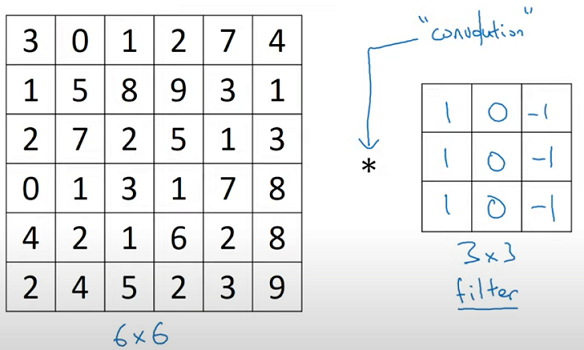

Instead of hard-coded filters, in a convolutional network the filter matrix is a set of trainable parameters (weights). As such, filters can be understood as vertical, horizontal or diagonal **edge detectors**.

This is an example of an 6x6 input image which is convolved by a 3x3 filter which results in a 4x4 "compressed" image.

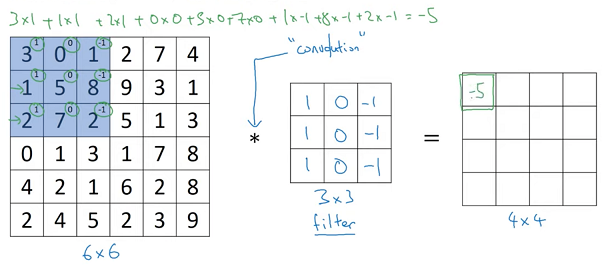

**Padding**

There are several mechanisms which allow to controll the size of the output image. Padding allows to keep the original dimensions of the input image and to keep pixal information from the image edges in the network.

With padding equal to 1, a 6x6 input image is transformed to a 8x8 image before passing the convolution operation such that the "compressed" image has now the size of 6x6.

The general formula fo compute the dimensions of the resulting image is n + 2p - f + 1 for nxn as the size of the input image, fxf is the size of the filter, and p is the number of additional pixels that is added on each side of the input image. By convention padding is done with zeros.

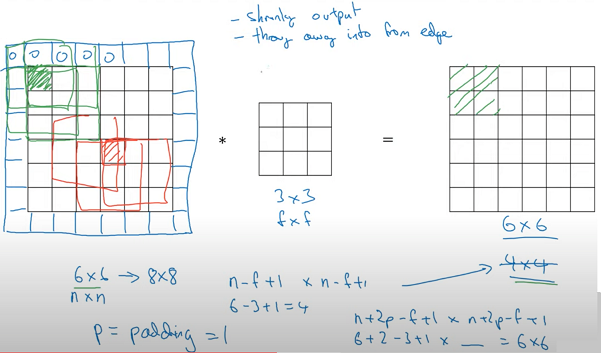

Traditionally, we speak of "valid" convolutions when no padding is applied to the input image, and of "same" convolutions when padding is applied such that the size of output image is equal to the side of the original image. To compute the required padding we can apply the following formula: p = f - 1 / 2.

**Strided convolutions** allow to "skip" pixes when applying the convolution operation. The full equation to compute the dimension of the resulting image is floor[(n + 2p - f) / s + 1] where s is the number of pixels which are skipped at each step when the filter is moved across the input image.

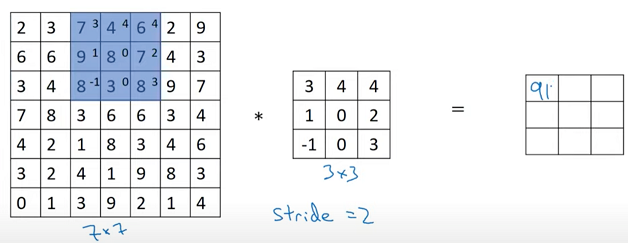

**Color images and multiple filters**

When dealing with **color images** we have a "three-dimensional" arrays as we have three channels where each corresponds to a color (read, green, blue - RGB).

We can say that in the case of RGB images, convolutions are performed on volumes. During convolution, the filter slides over the 2-D surface of each channel and across different color channels:

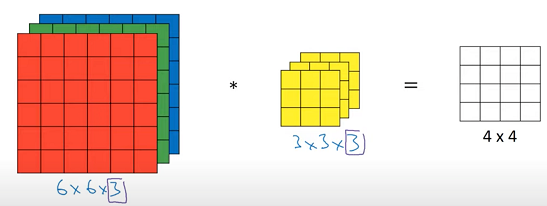

You can have multiple filters (a free to chose parameters) to detect edges in multiple directions.

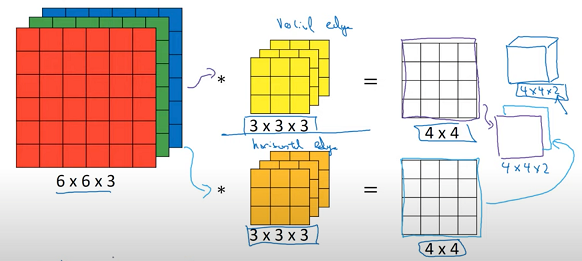

**Pooling**

Beside layers where convolutions are applied to the input features, there are also **pooling transformations** which allow to shrink the output size of the image. Traditionally in CNNs, **max pooling** is applied.

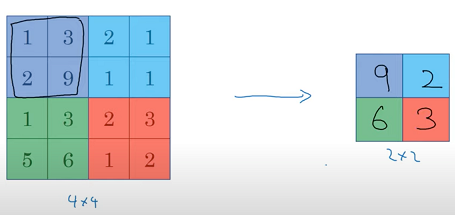

**Parameter sharing and sparsity**

There are two mechanisms which make CNNs powerful. First, we speak about **parameter sharing**. This is the idea that same filters (feature detectors) which are learned on one part of an image, are used to recognize edges in different parts of the image.

Second mechanism is of **sparsity of connections**. By that we mean that the output vaue of a convolution is not dependent on each pixel of the input image. This allows to build deeper CNNs in contrast to simple perceptrons (NNs based on matrix multiplication).

**Residual blocks**

Other ideas which allow to build even deeper CNNs are residual blocks which allow to skips convolutions.

**Tasks in computer vision**

The simplest task which can be solved with CNNs is **image classification**, i.e. recognizing the general class of an image. For instance, depicts an image A a dog or a cat.

Another important task in CV is **object detection** which involes recognizing and tagging (output a boundary) potentially multiple objects in an image. Object recognition as task implies also object localization, identifying in which part of the image a target object is located.

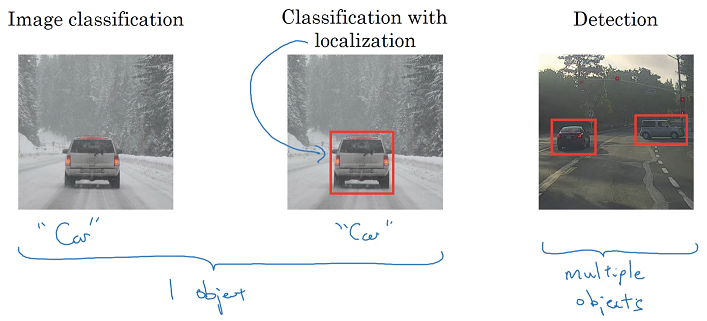

In a more traditional approach, you first train a network (or even a simpler linear model) on cropped images of target objects (e.g., cars). Secondly, you can implement a slinding window across a bigger input image and have the trained network classify whether there is a target object (a car) within each window of the input image (target labels are 1,0).

figure

There are computational downsides to that approach. Instead, we can use CNNs to detect obects in each image in a single "run". detection with convolutions

Evaluation of the bounding box - intersection of the union

figure

Non-max suppresion to stop multiple detection of the same object

Anchor boxes allow to identify obejt which overlaps across different sliding windows

**Face verification and face recognition**

verification is easier because we have to decide on a single image whether the person is in your data base (compare two images): input image vs each image from the data base

**One-shot learning**

just a single example for learning, learn a difference function for an image
this is done with siamease networks

take image and buid an "encoding" with a CNN
take a second image and encode it with the same network
compare both embeddings with distance/difference measure

Learn parameters to output close encodings for pairs of pictures for the same persons

triplet loss: anchor image vs positive example and anchor image vs negative example

**Object segmentation**

see https://medium.com/visionwizard/object-segmentation-4fc67077a678

# Recurrent Neural Networks


https://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/





A RNN, at its most fundamental level, is simply a subtype of densely connected neural network (MLP) with the key difference being the introduction of time – in particular, the output of hidden layer(s) in a RNN is fed back into itself. 

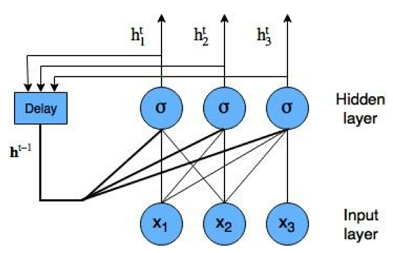

First, we have a simple RNN with three input "neurons". These input "neurons" are fed into a hidden layer, with sigmoid activations. Then, the output of the hidden layer is fed back into the same hidden layer at the netx time step.

For instance, when predicting the next word in a sentence, the hidden layer uses the prediction from the previous step into consideration.

We can visualize this process either as a MLP with a build-in loop or as a sequence of network states (*unroll* the computations of the network):



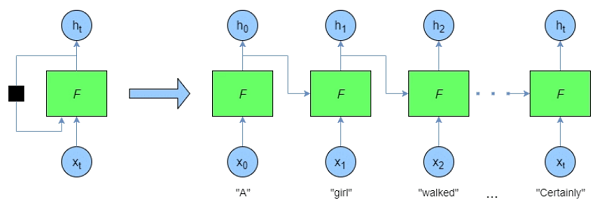

We can unroll the network as shown on the right-hand side of the diagram above because we always supply only finite length sequences to such networks.

Furthermore, the weights of the connections between time steps are shared, i.e. there isn’t a different set of weights for each time step.

In the case of words, we supply word vectors from embeddings to the network. Traditionally, word2vec embeddings are used for this.

RNNs are very flexible in terms of the number of inputs and outputs. We can have relations as:
- a many-to-many model (or sequence to sequence)
– a one-to-many, i.e. supplying a single word and predicting multiple outputs
- a many-to-one, i.e. supplying many words as input, and predicting the next word 

In the diagram below, the words next to the outputs are the target words which we would supply during training.

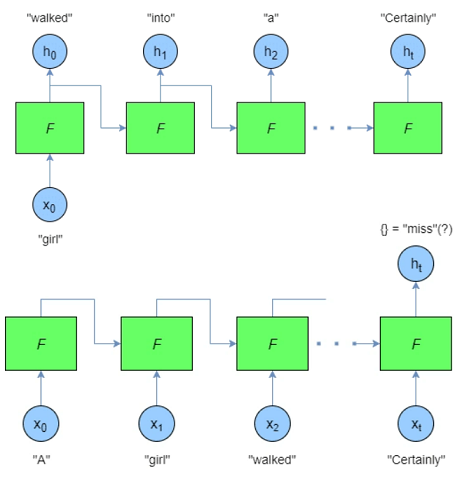

For a simple walkthrough, see https://youtu.be/DY82Goknf0s Go to 6:43

**Vanishing gradient problem**

For RNNs, ideally, we would want to model long temporal dependencies, so the network can connect data relationships at significant distances in time.

However, the more time steps we add, the higher the chance that back-propagation gradients either accumulating and exploding or vanishing down to zero.

This is easier to see when considering the mathematical representation of a RNN:

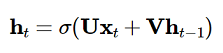

Where $\textbf{U}$ and $\textbf{V}$ are the weight matrices connecting the inputs and the recurrent outputs respectively. We finally often will perform a softmax of all the $\textbf{h}_t$ outputs.

However, if we go back three time steps in our RNN, we have the following computation:

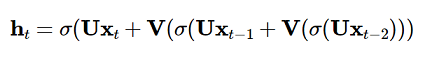

As we work our way back in time, we are essentially adding deeper and deeper layers to our network which causes a problem during gradient computation. With respect to the weight matrix $\textbf{U}$ during backpropagation through time, it looks something like this:

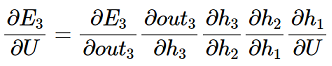

Each of these gradients will involve calculating the gradient of the sigmoid function. The problem with the sigmoid function occurs when the input values are such that the output is close to either `0` or `1` – at this point, the gradient (1st derivative) is very small:

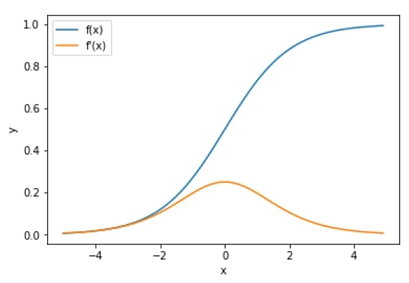

The values of the gradient (orange line) are always \<0.25 and get to very low values when the output gets close to 0 or 1 which means that when you multiply many sigmoid gradients together you are multiplying many values which are potentially much less than zero – this leads to a vanishing gradient $\frac{\partial E}{\partial U}$.

Because the gradient will become basically zero when dealing with many prior time steps, the weights won’t adjust to take into account these values, and therefore the network won’t learn relationships separated by significant periods of time.

We could use ReLU activation functions to reduce this problem, though not eliminate it.

**Long short-term memory networks (LSTMs)**

The LSTM cell is a specifically designed unit of logic that reduces the vanishing gradient problem by creating an internal memory state which is simply ***added*** to the processed input reducing the multiplicative effect of small gradients.

Additionally, the time dependence and effects of previous inputs are controlled by a *forget gate*, which determines which states are remembered or forgotten.

Below is a diagram of a LSTM cell:

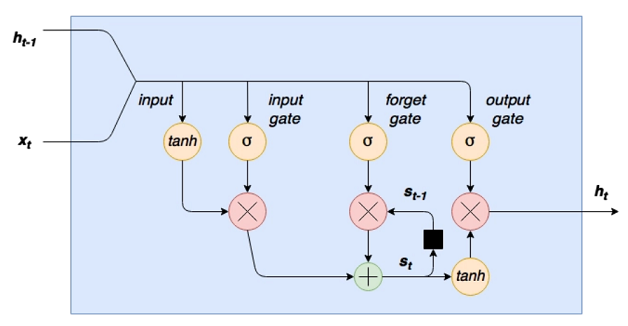

The data flow is from left-to-right, with the current input $x_t$ and the previous cell output $h_{t-1}$ concatenated together and entering the cell. First, the input is squashed between -1 and 1 using a *tanh* activation function:



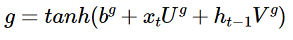

Here $U^g$ and $V^g$ are the weights for the input and previous cell output, respectively, and $b^g$ is the input bias. The exponent *g* signifies that these are the input weights and bias values.

This squashed input is then multiplied element-wise by the output of the input gate. The input gate is basically a hidden layer of sigmoid activated nodes, with weighted $x_t$ and $h_{t-1}$ input values, which outputs values of between 0 and 1 and when multiplied element-wise by the input determines which inputs are switched on and off. In other words, it is a kind of input filter or gate. The expression for the input gate is:


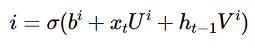

The output of the input stage of the LSTM cell can be expressed below, where the $\circ$ operator expresses element-wise multiplication:

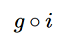

Now, $s_t$ is the inner state of the LSTM cell which is computed at each computation step. This state is delayed by one-time step and is ***added*** to the $g \circ i$ input to provide an internal recurrence loop to learn the relationship between inputs separated by time.

Analogous to the input gate, the forget gate is a sigmoid activated set of nodes which is element-wise multiplied by $s_{t-1}$ to determine which previous states should be remembered (i.e. forget gate output close to 1) and which should be forgotten (i.e. forget gate output close to 0). In other words, the forget gate output acts as weights for the internal state.

This is expressed as:

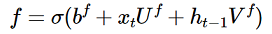

The output of the element-wise product of the previous state and the forget gate is expressed as $s_{t-1} \circ f$.

Let us stress again that the forget-gate-“filtered” state is simply ***added*** to the input, rather than multiplied by it, or mixed with it via weights and a sigmoid activation function in contrast a standard RNN. This is important to reduce the issue of vanishing gradients.

The output from this stage, $s_t$ is expressed by:

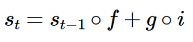

The final stage of the LSTM cell is the output gate which has two components – another *tanh* squashing function and an output sigmoid gating function.

The output sigmoid gating function, like the other gating functions in the cell, is multiplied by the squashed state $s_t$ to determine which values of the state are output from the cell.

The output gate is expressed as:

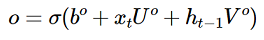

So the final output of the cell can be expressed as:

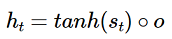

For a simple walkthrough see https://www.youtube.com/watch?v=eCvz-kB4yko Go to 2:07

**How LSTMs approach vanishing gradient problem**

The recurrency of the internal state of the LSTM cell involves, an addition:


image.png

If we take the partial derivative of this recurrency, we get:

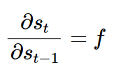

Notice that the $g \circ i$ term drops away and we are just left with a repeated multiplication of $f$. So for three time steps, we would have $f x f x f$. Notice that if the output of $f=1$, there will be no decay of the gradient.

Generally, the bias of the sigmoid in $f$ is made large at the beginning of training so that $f$ starts out as 1, meaning that all past input states will be “remembered” in the cell.

During training, the forget gate will reduce or eliminate the memory of certain components of the state $s_{t-1}$.

Imagine if we let in a single input during the first time step, but then we block all future inputs (by setting the input gate to output zeros) and remember all previous states (by setting the forget gate to output ones). We would have a kind of circulating memory of $s_t$ which never decays i.e. $s_t$ = $s_{t-1}$.

A back-propagated error “entering” this loop would also never decay. With the vanilla recurrent neural network, however, if we did the same thing our back-propagated error would be continuously degraded by the gradient of the activation function of the hidden nodes, and therefore eventually decay to zero.

**Data dimensions in LSTMs with an example**

Let's assume we have embedding vectors for single words of the length of 650. Next, because we will be inputting a sequence of words into our unrolled LSTM network, for each sentence we will be inputting 35 of these word vectors. So the input for each sentence will be (35 x 650) in size.

Finally, during training we process batches of sentences via multi-dimensional tensors. If we have a batch size of 20, our training input data will be (20 x 35 x 650). This is called a “batch-major” arrangement, where the batch size is the first dimension of the tensor. We could also alternatively arrange the data in “time-major” format, which would be (35 x 20 x 650).

The size of the output from the unrolled LSTM network with a size 650 hidden layer, and a 20 length batch-size and 35 time steps will be (20, 35, 650).

Often, the output of an unrolled LSTM will be partially flattened and fed into a softmax layer for classification – so, for instance, the first two dimensions of the tensor are flattened to give a softmax layer input size of (700, 650).

The output of the softmax is then matched against the expected training outputs during training.


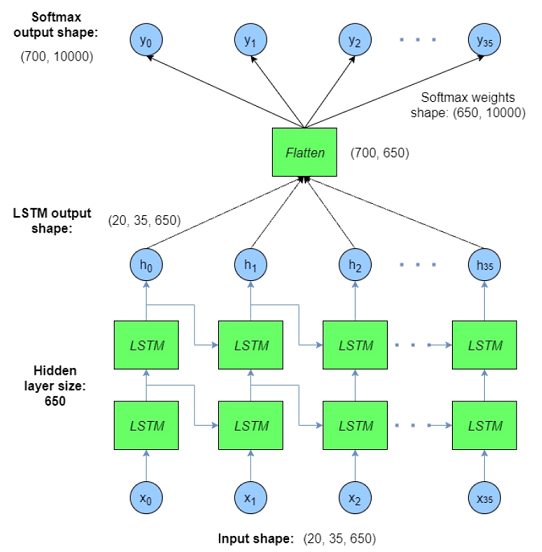

As seen above, it is possible to stack layers of LSTM cells on top of each other – this increases the model complexity and predictive power but at the expense of training times and other difficulties.

**Gated Reccurent Unit (GRUs)**

The key difference between GRU and LSTM cells is that GRU has two gates that are called *reset* and *update* in contrast to the three gates (input, forget, output) in LSTM.

Since GRUs have less trainable parameters they are often preffered over LSTMs in practice.

See for more details https://blog.floydhub.com/gru-with-pytorch/

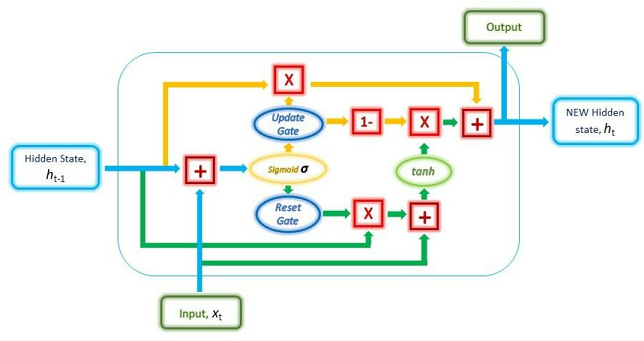

**Attention in Decoder-Encoder RNNs**

https://theaisummer.com/attention/

The attention mechanism emerged in encoder-decoder LSTM architectures which were used for neural translation tasks. The goal of such models is to transform an input sequence (source sentence) to a new one (target sentence). Whereas the two sequences can be of the same or arbitrary length.

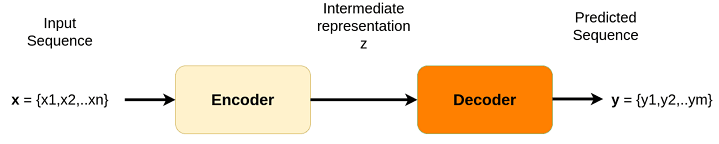

The encoder and decoder are nothing more than stacked RNNs. The encoder processes the input and produces one compact representation, called **z**, from all the input timesteps. It can be regarded as a compressed representation of the input sentence. This can be represented like this:

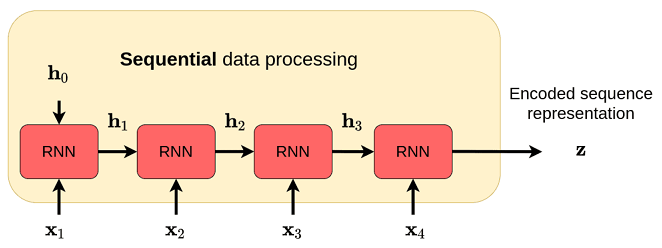

On the other hand, the decoder receives the context vector **z** and generates the output sentence.

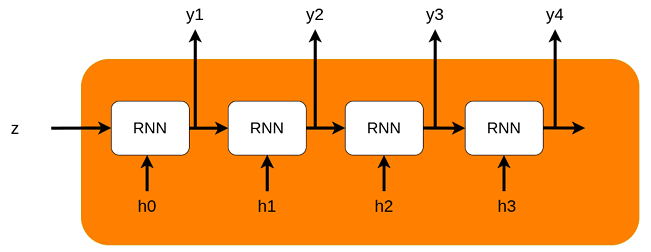

However, this works only for short sentences (lees than 20 words) since the intermediate representation **z** cannot encode information from all the input timesteps. This is commonly known as the **bottleneck** problem.

The vector **z** needs to capture all the information about the source sentence. However in practice, how far we can see in the past (the so-called reference window) is finite.

The solution is then to give the context vector **z** access to all parts of the input sequence instead of just the last one.

The idea of **attention** was originally proposed for computer vision saying that by looking at different parts of the image (glimpses), we can learn to accumulate information about a shape and classify the image accordingly.

The same principle was extended to sentences. We can look at all the different words at the same time and learn to “pay attention“ to the correct ones.

**Implicit vs explicit attention**

Deep networks are very rich function approximators. So, without any further modification, they tend to ignore parts of the input and focus on others. One way to visualize implicit attention is by looking at the partial derivatives with respect to the input (see Jacobian matrix; https://medium.com/unit8-machine-learning-publication/computing-the-jacobian-matrix-of-a-neural-network-in-python-4f162e5db180).

By asking the network to *weigh* its sensitivity to the input based on memory from previous inputs, we introduce **explicit** attention.




**Hard vs soft attention**

In all the previous cases, we refer to attention that is parametrized by **differentiable** functions. For the record, this is termed as **soft** attention in the literature.

Soft attention means that the function varies smoothly over its domain and, as a result, it is differentiable.

Historically, we had another concept called **hard** attention. For instance, imagine a robot in a labyrinth that has to make a hard decision on which path to take.

Hard attention can be regarded as a switch mechanism to determine whether to attend to a region or not, which means that the function has many abrupt changes over its domain.

In general, **hard** means that it can be described by **discrete** variables while soft attention is described by continuous variables.

To be able to train a network with backpropagation, we have to use soft attention.

**Computing attention**

Given the previous state in the decoder as $\textbf{y}_{i-1}$ and the the hidden state $\textbf{h} = {h_1,h_2,h_n}$, we have something like this:

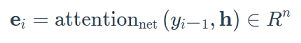

The index *i* indicates the prediction step. Essentially, we define a score between the hidden state of the decoder and all the hidden states of the encoder.

More specifically, for each hidden state (denoted by *j*) $\textbf{h}_1,\textbf{h}_2,\textbf{h}_n$ we will calculate a scalar:

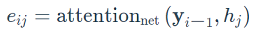

Visually, we can understand this as:

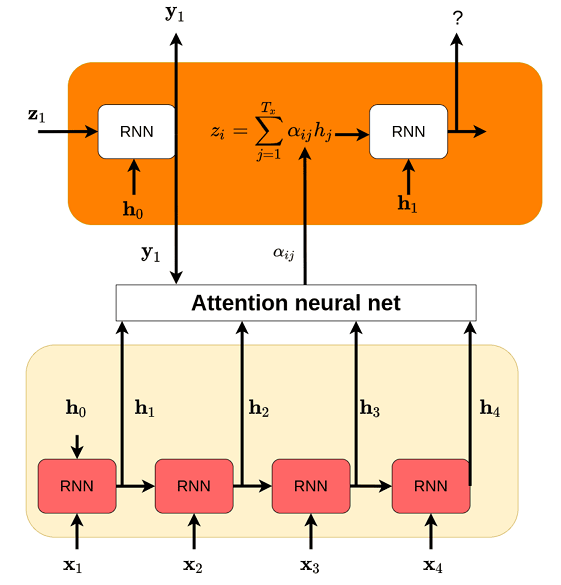

The *α* in the above equation refers to the softmax function:

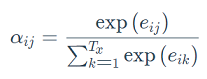

In theory, attention is defined as the **weighted** average of values. But this time, the **weighting is a learned function**. Intuitively, we can think of $\alpha_{i j}$ as data-dependent dynamic weights.

Over the years there have been many different ideas to compute that score. The simplest one, computes attention as the **dot product** between the two states $y_{i-1}\textbf{h}$.

Extending this idea we can introduce a **trainable** weight matrix in between $y_{i-1}W_a\textbf{h}$, where $W_a$ is an intermediate matrix with learnable weights. 

Extending even further, we can also include an activation function in the mix which leads to our familiar neural network approach ${v_a^T}{tanh}(W_a[h; y_{i-1}])$ proposed by Bahdanau.

In certain cases, the alignment is only affected by the position of the hidden state, which can be formulated using simply a softmax function $\operatorname{softmax}(y_{i-1},\textbf{h})$.

The last one worth mentioning can be found in Graves A. in the context of Neural Turing Machines and calculates attention as a cosine similarity $cosine[y_{i-1},\textbf{h}]$.

See for more details https://lilianweng.github.io/posts/2018-06-24-attention/

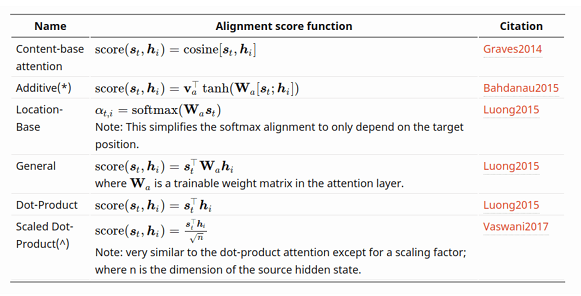

**Intuition behind attention in translation tasks**

One intuitive way to understand attention in translation tasks is to think of it as a (soft) **alignment** between words. We can visualize the attention of a trained network using a heatmap such as below.

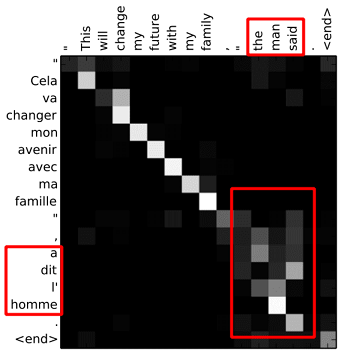

“Intuitively, this implements a mechanism of attention in the decoder. The decoder decides parts of the source sentence to pay attention to. By letting the decoder have an attention mechanism, we relieve the encoder from the burden of having to encode all information in the source sentence into a fixed-length vector. With this new approach, the information can be spread throughout the sequence of annotations, which can be selectively retrieved by the decoder accordingly.” from https://arxiv.org/abs/1409.0473

**Global vs local attention**

By introducing attention, we sacrificed computational complexity since we have another neural network to train and we need to have $O(T^2)$ weights (where $T$ is the length of both the input and output sentence).

This complexity is due to the fact that until now we assumed that attention is computed over the entire input sequence (global attention). In contrast, in local attention we consider only a subset of the input units.

Evidently, this can sometimes be better for very long sequences. Local attention can also be merely seen as hard attention since we need to take a hard decision first, to exclude some input units.

Let's us make the following analogy:

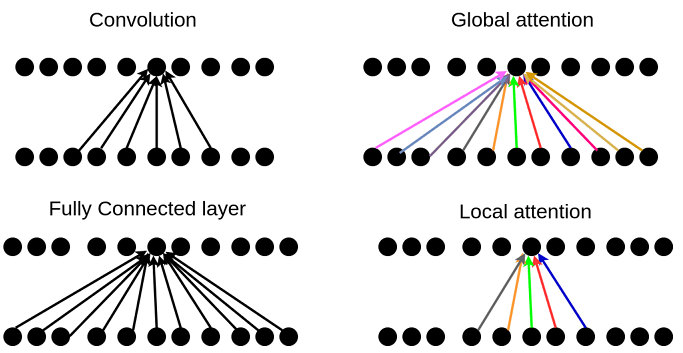

The colors in the attention indicate that these weights are constantly changing while in convolution and fully connected layers they are slowly changing by gradient descent.

**Advantages of attention**

First, attention usually eliminates the vanishing gradient problem, as they provide direct connections between the encoder states and the decoder. Conceptually, they act similarly as *skip connections* in convolutional neural networks.

One other aspect that I’m personally very excited about is explainability. By inspecting the distribution of attention weights, we can gain insights into the behavior of the model, as well as to understand its limitations.

**Further examples of attention in LSTMs**

- https://towardsdatascience.com/recognizing-speech-commands-using-recurrent-neural-networks-with-attention-c2b2ba17c837
- https://machinelearningmastery.com/attention-long-short-term-memory-recurrent-neural-networks

# Transformers

See https://theaisummer.com/transformer/

**Self-attention**

Apart from the attention across the encoder and decoder as seen in the previous chapter, we can also define the attention of the same sequence, called **self-attention**.

Instead of looking for an input-output sequence association/alignment like in RNNs, we are now looking for scores between the elements of a single sequence (e.g., sentence).

When speaking about word embeddings, this allows us to *contextualize* word embeddings by computing an attention score across neighbouring words within a sentence. Again, attention is used as a *re-weighing mechanism*. See https://www.youtube.com/watch?v=yGTUuEx3GkA 



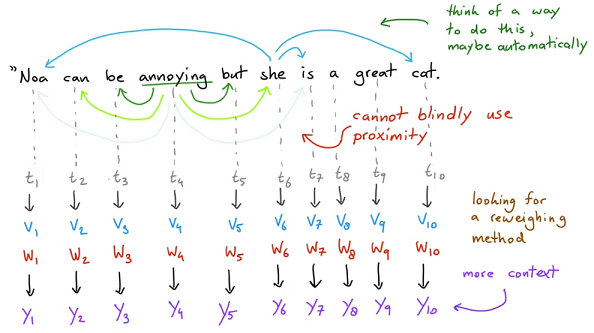

Starting with two static word embeddings, e.g., *King* and *Queen*, we could say that each dimension of the two embedding vectors is representing a specific semantic dimension.

As next, we assume that depending on the sentence context, the specific numbers of a word embedding, and consequently its semantic meaning, are shifted. Consider the contrast *Burger King* vs *King of Whales*.

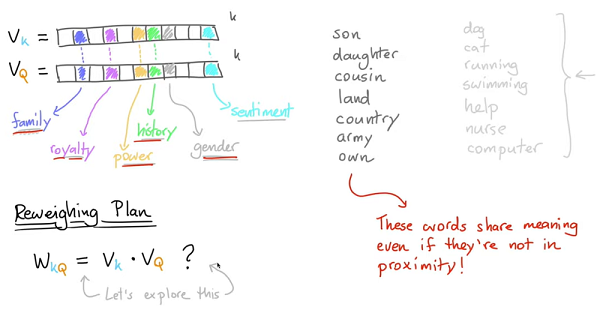

First, we compute a weight matrix between each of the sequences tokes (target) and the remaining tokens. Those weights are normalized such that they sum to 1 which allows to reweight all remaining word embeddings towards the target token.

In the specific example, the meaning of *bank* should now be closer to *water* because of the presence of *river* in the sentence.

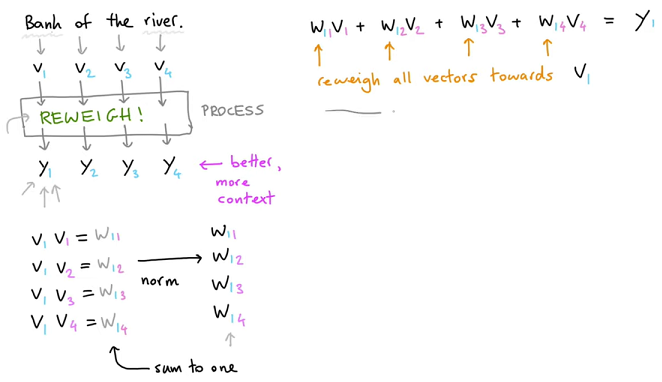

We apply this reweighing to all word embeddings within the sentence:

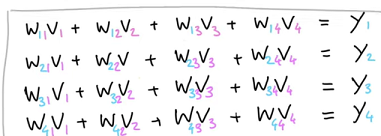

Self-attention is the fundamental building block of a transformer.

The central observation from this computation is that the length of a sequence and the order within the sequence doesn't change the result. This is a big departure from a RNN. Instead, we feed the entire input sequence into the network.

Now, the question is, how can we reweight the *static* word embeddings and make these weights learnable by the network?

**Combining self-attention with trainable weights**

See https://www.youtube.com/watch?v=tIvKXrEDMhk

This is a visual summary for computing a contextualized vector using the third word as a target word embedding:

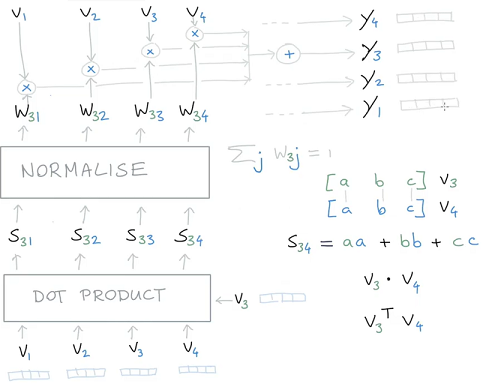

Now, at each step of the self-attention computation, we introduce a set of trainable parameters, which are called:

- query == the target word embedding which gets enriched with context
- keys == word embbeddings of all remaining words in the sequence
- value == the contextualized word embeddings after application of self-attention

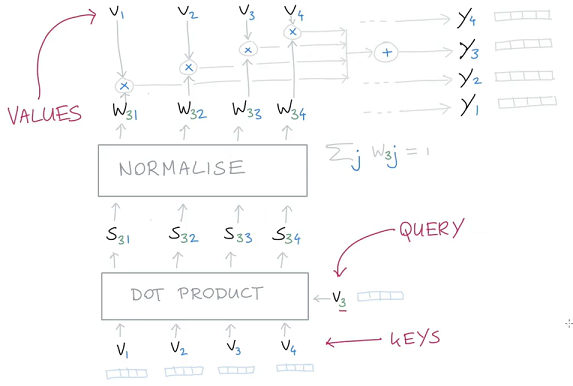

This can easily be done by multiplying our input $\textbf{X} \in R^{N \times d_{model} }$ with 3 different weight matrices $\textbf{W}_Q$, $\textbf{W}_K$, and $\textbf{W}_V \in R^{ d_{model} \times d_{k}}$. In essence, it's just a matrix multiplication in the original word embeddings.

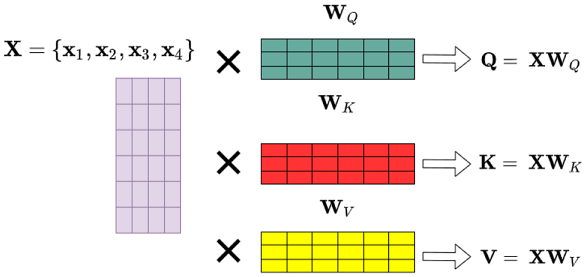

Finally, we can combine everything in a **self-attention block** which can be trained using backpropagation:

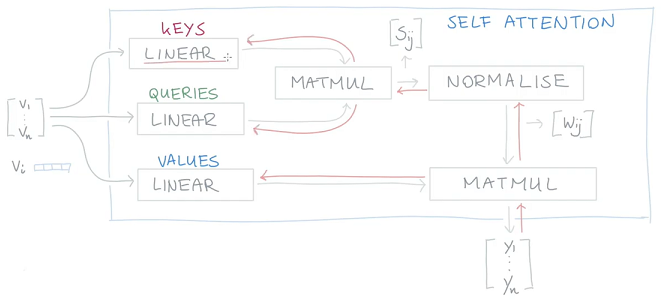

We can stack an arbitrary number of those self-attention blocks together.

**Multi-headed self-attention**

See https://www.youtube.com/watch?v=23XUv0T9L5c

The idea behind multi-head attention is based on the observation that attention from the target word embedding is spead across different word embeddings:

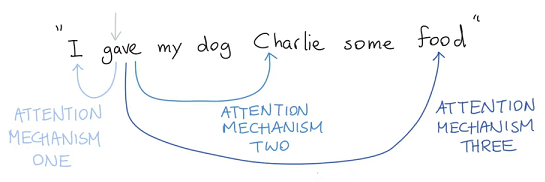

Therefore, we can introduce multiple self-attention blocks (the number of which is not dependent on the  number of words) which don't share any weights across them and are trained in parallel.

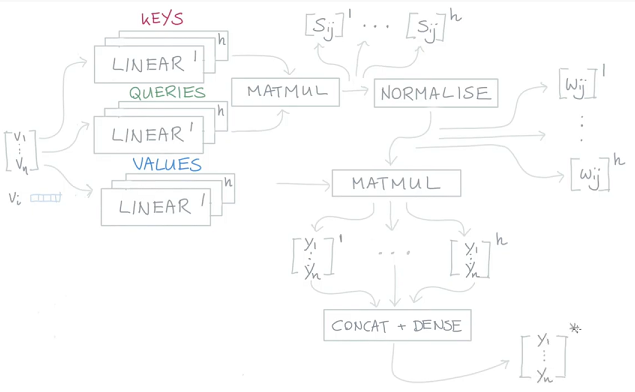

At the end, since we have multiple contextualized word vectors sequences (as many as we have self-attention heads), we need to concatinate them all and pass the final result through a single dense layer.

Here is a link to a Colab notebook with visualization of multi-headed self-attention: https://colab.research.google.com/github/tensorflow/tensor2tensor/blob/master/tensor2tensor/notebooks/hello_t2t.ipynb#scrollTo=T7UJzFf6fmhp (TF 1; doesn't work anymore..)

TO_DO

**Attention is all you need (2017)**

See https://www.youtube.com/watch?v=EXNBy8G43MM

We've already discussed dot-product attention and the multi-head attention:

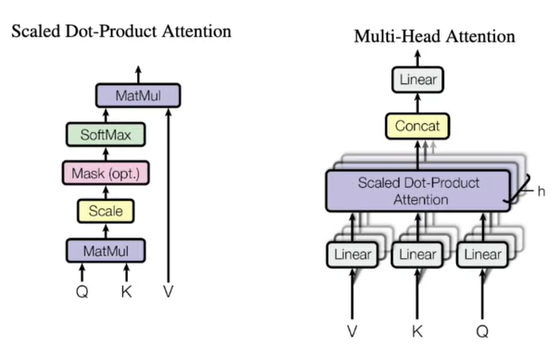

One difference is that the dot-product is scaled for numeric stability by dividing by $\sqrt{d_{k}}$ to make sure that the gradients won’t explode. $d$ is the length of a word embedding vector.

Furthermore, there is masking applied to the input sequence for self-supervised learning without labels (see below).

Here is the whole self-attention block in detail:


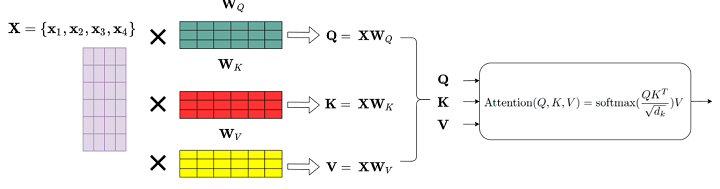

The self-attention block is embedded within the multi-head attention block which is used throughout the Transformer architecture:

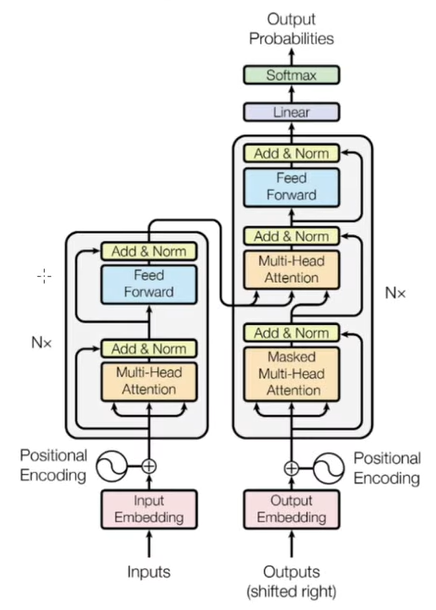

The original Transformer was applied to a translation task and consists of an *encoder* on the left side, and a *decoder* on the right side.

The encoder block was used in models like **BERT** (bidirectional encoding representations from a Transformer).

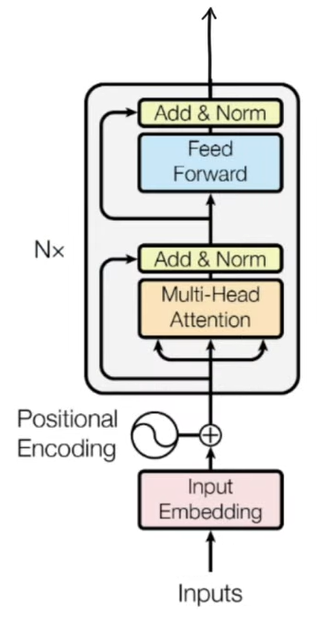

**Hyperparameters**

It's possible to stack those Transformer encoders on top of each other as represented by $N_x$ and is a hyperparameter. Furthermore, the number of heads in the multi-head attention block is another hyperparameter.

**Skip connections**

We can observe different paths that the data takes through the encoder and "skips" the attention transformations.

In a very rough manner, skip connections give a transformer a tiny ability to allow the representations of different levels of processing to interact.

With the forming of multiple paths, we can “pass” our higher-level understanding of the last layers to the previous layers. This allows us to re-modulate how we understand the input. Again, this is the same idea as human top-down understanding, which is nothing more than expectations.

See more details on skip connections here https://theaisummer.com/skip-connections/

**Positional encoding**

The attention doesn't care about the order and partly this is a good thing since you want context avaible to travel from the beginning of the sentence to the end (*bidirectional*). However, we need to push the algorithm a little bit such that position does have meaning.

In the paper, the authors came up with the sinusoidal function for the positional encoding. The sine function tells the model to pay attention to a particular wavelength $\lambdaλ$.

Given a signal $y(x) = \sin (k x)$ y(x)=sin(kx) the wavelength will be $k = \frac{2 \pi}{\lambda}$. In our case the $\lambdaλ$ will be dependent on the position in the sentence. $i$ is used to distinguish between odd and even positions.

Mathematically:


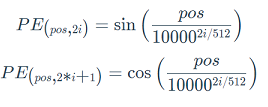

For the record, $512= d_{model}$, which is the dimensionality of the embedding vectors.

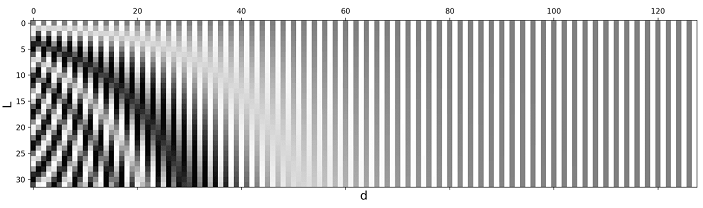

**Linear layers**

TO_DO

**Decoder**

TO_DO

**Encoder-Decoder attention**

*Encoder-decoder* models use both parts of the Transformer architecture. At each stage, the attention layers of the encoder can access all the words in the initial sentence, whereas the attention layers of the decoder can only access the words positioned before a given word in the input.

The pretraining of these models can be done using the objectives of encoder or decoder models, but usually involves something a bit more complex.

For instance, T5 is pretrained by replacing random spans of text (that can contain several words) with a single mask special word, and the objective is then to predict the text that this mask word replaces.

Sequence-to-sequence models are best suited for tasks revolving around generating new sentences depending on a given input, such as summarization, translation, or generative question answering.

Representatives of this family of models include:

- BART
- mBART
- Marian
- T5

**Why do Transformers work so well?**

TO_DO

**Additional resources**
- https://medium.com/nlplanet/two-minutes-nlp-20-learning-resources-for-transformers-1bbff88b7524

# Generative Adversarial Networks (GANs)

TTS Pipeline: char->phoneme(TN+gr2Phon)->mel-spec(Tocotron2, DeepSpeech3, TransformerTTS, FastSpeech1/2)->wav form(WavGAN, MelGAN, Hifi-GAN, WavGlow, WaveGrad, DiffWave, FloWaveNet)
- char2wav, clariNet, FastSpeech2s, EATS
https://paperswithcode.com/method/hifi-gan
https://arxiv.org/abs/1701.00160


# Multimodal networks

**Multimodal Networks**

see https://theaisummer.com/vision-language-models/